# CAMS data demo

## Introduction
This notebook demonstrates opening and plotting data from two data sets:
 - CAMS Global reanalysis (EA4C)
 - CAMS European air quality Reanalysis 
 
###  CAMS Global reanalysis (EA4C)
Available from 2003 to June 2022 (continues to be updated)
0.75 degrees Horizontal resolution
3 hourly temopral resolution
 
### CAMS European air quality Reanalysis 
Available for 2018 to 2021 
(Will be updated, plans to create historical data for O3, NO2 and PM10 for 2013 to 2017)
0.1 degrees Horizontal resolution
1 hourly temopral resolution
 
 

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

## The Harmonia cities

In [2]:
cities = ['Piraeus', 'Ixelles', 'Sofia', 'Milan']
# Chose one of the cities above
city = 'Piraeus'

## Open the CAMS Global reanalysis dataset for the chosen city

get an xarray containing the data

In [3]:
data_dir = "data/by_city/cams_global_reanalysis_eac4/"
path = Path(data_dir, city)
# The data are in multiple files, one per year. We can open them all together
files = f"{path}/cams_global_reanalysis_concentrations_*.nc"

# Open the data as an xarray
data = xr.open_mfdataset(files)

### Quick look at variables in the data set

In [4]:
# List the variables available in the data set
variables = list(data.keys())
print("Available variables :\n", variables)

# and the metadata for one of the variables
print("\n metadata for co :\n",data['co'].attrs)

Available variables :
 ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']

 metadata for co :
 {'units': 'ug m**-3', 'long_name': 'Carbon monoxide concentration', 'standard_name': 'concentration_of_carbon_monoxide_in_air'}


### A closer look at the variables in the data set
Print the metadata for all of the variables \
The concentrations are in $\mu \text{g}\, \text{m}^{-3}$

In [5]:
# List the variables available in the data set
print(f"Available variables: {variables}\n")
print(f"Name  : (units)     Long name                            Standard name")
print(f"----------------------------------------------------------------------------------------")
for var in data.keys():
    spaces1 = ' '*(9 - len(data[var].attrs['units']))
    spaces2 = ' '*(35 - len(data[var].attrs['long_name']))
    print(f"{var:6}: ({data[var].attrs['units']}){spaces1} {data[var].attrs['long_name']} {spaces2}: ({data[var].attrs['standard_name']})")


Available variables: ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']

Name  : (units)     Long name                            Standard name
----------------------------------------------------------------------------------------
co    : (ug m**-3)  Carbon monoxide concentration       : (concentration_of_carbon_monoxide_in_air)
no2   : (ug m**-3)  Nitrogen dioxide concentration      : (concentration_of_nitrogen_dioxide_in_air)
no    : (ug m**-3)  Nitrogen monoxide concentration     : (concentration_of_nitrogen_monoxide_in_air)
go3   : (ug m**-3)  Ozone concentration (full chemistry scheme) : (concentration_of_ozone_in_air)
pan   : (ug m**-3)  Peroxyacetyl nitrate                : (concentration_of_peroxyacetyl_nitrate_in_air)
so2   : (ug m**-3)  Sulphur dioxide concentration       : (concentration_of_sulfur_dioxide_in_air)
pm10  : (ug m**-3)  Particulate matter d <= 10 um       : (mass_concentration_of_pm10_ambient_aerosol_particles_in_air)
pm2p5 : (ug m**-3)  Particulate mat

## Plot timeseries of concentrations for the city

In [6]:
# formatted Labels for plots
labels = {'pm10':r"PM$_{10}$",
          'pm2p5':r"PM$_{2.5}$",
          'co': "CO",
          'no2': r"NO$_{2}$",
          'no': "NO",
          'go3': r"Ground Ozone", 
          'pan': "PAN",
          'so2': r"SO$_{2}$"}
# and for units
unit = r"$\mu g \ m ^{-3}$" 

### Plot the whole timeseries

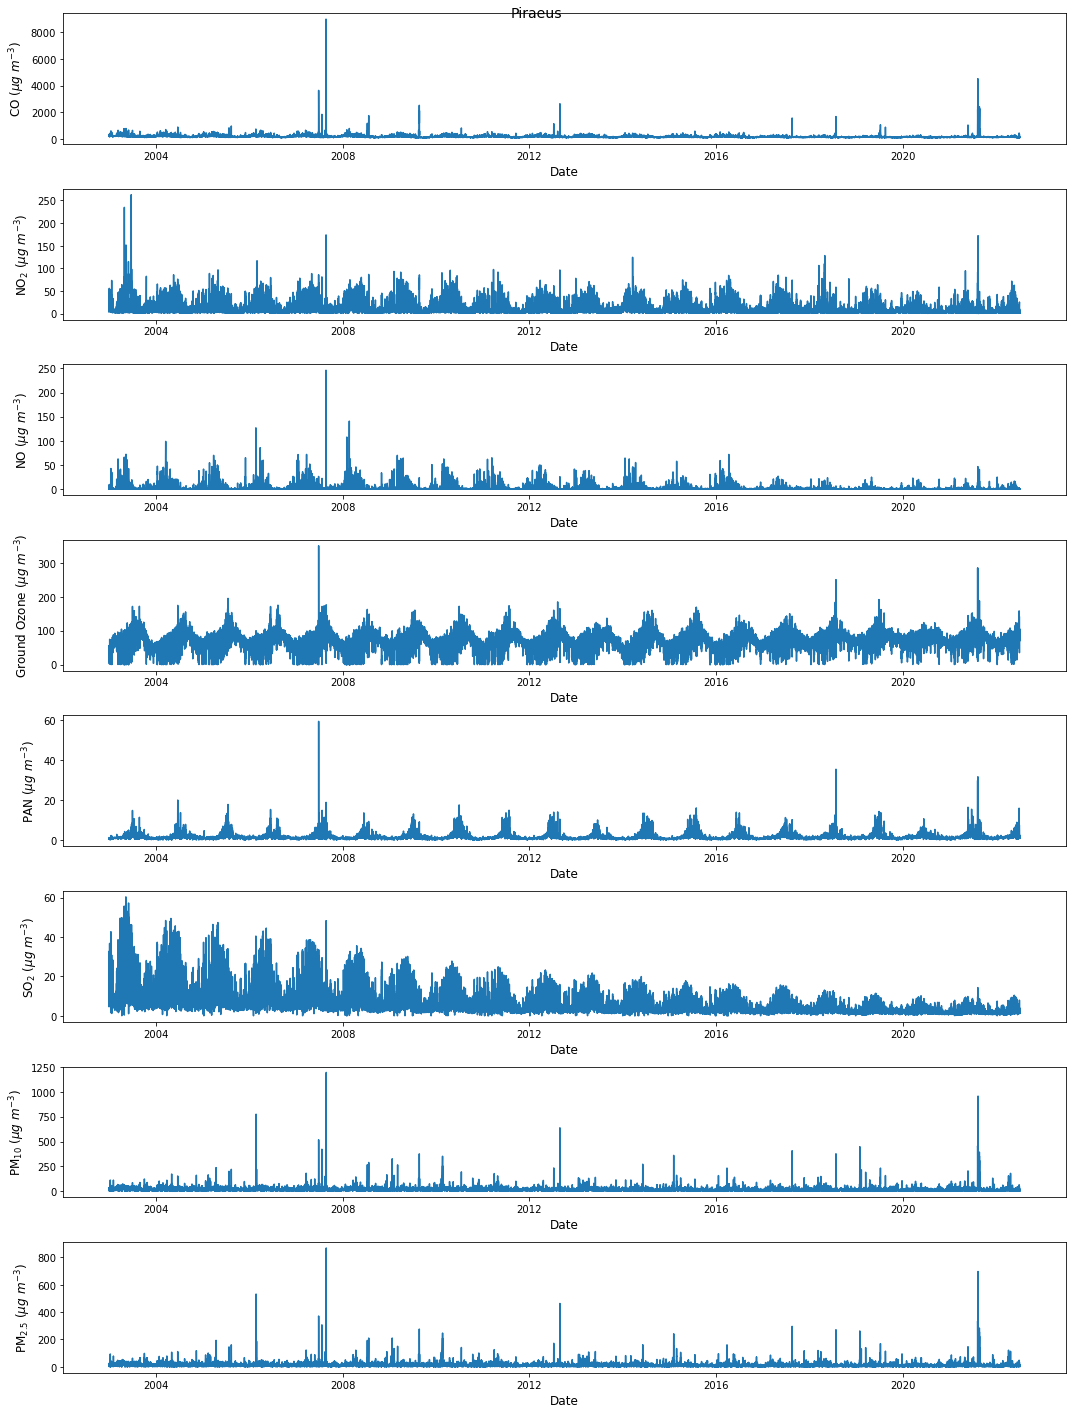

In [7]:
fig, axs = plt.subplots(len(variables), 1, figsize = (15, 20))
for ax, variable in zip(axs.flatten(), variables):
    ax.plot(data.time, data[variable])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.suptitle(city, fontsize=14)
fig.tight_layout()

### Plot data for one year

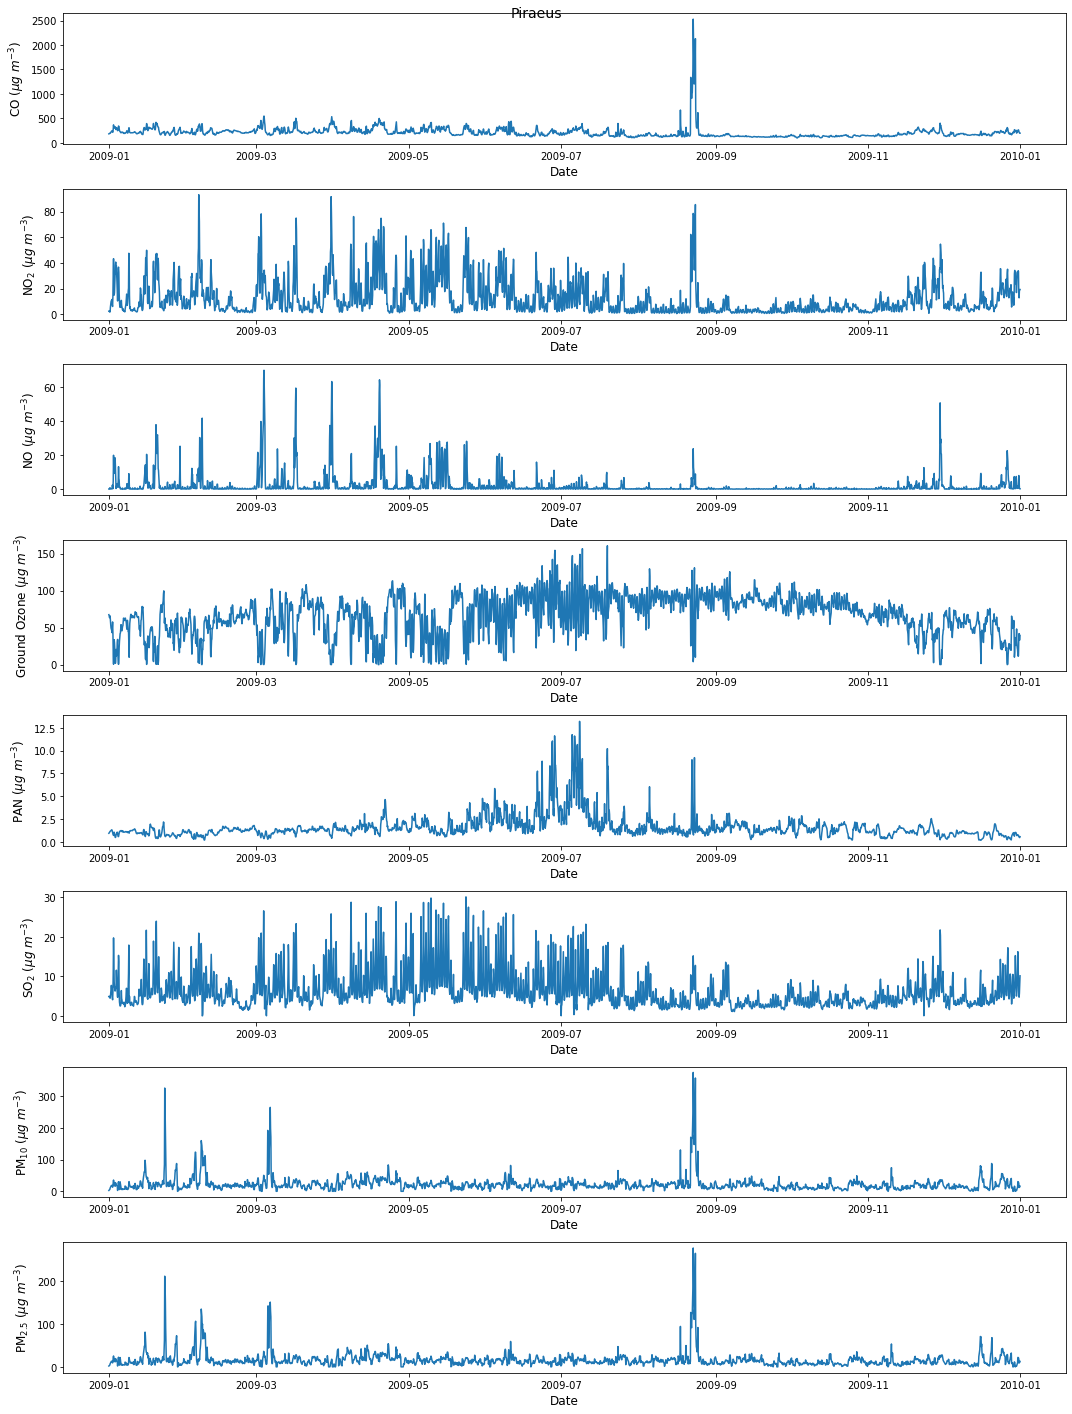

In [8]:
year = 2009

in_year = data.time.dt.year == year

fig, axs = plt.subplots(len(variables), 1, figsize = (15, 20))
for ax, variable in zip(axs.flatten(), variables):
    ax.plot(data.time[in_year], data[variable][in_year])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.suptitle(city, fontsize=14)
fig.tight_layout()

## Open the CAMS European Air Quality reanalysis dataset for the chosen city

get an xarray containing the data

In [9]:
data_dir = "data/by_city/cams_europe_AQ_reanalyses/"
path = Path(data_dir, city)
# The data are in multiple files, one per year. We can open them all together
files = f"{path}/cams_Eur_AQ_reanalysis_*.nc"
print(files)
# Open the data as an xarray
data_Eur_AQ = xr.open_mfdataset(files)

data/by_city/cams_europe_AQ_reanalyses/Piraeus/cams_Eur_AQ_reanalysis_*.nc


### Quick look at variables in the data set

In [10]:
# List the variables available in the data set
variables = list(data_Eur_AQ.keys())
print("Available variables :\n", variables)

# and the metadata for one of the variables
print("\n metadata for co :\n",data_Eur_AQ['co'].attrs)

Available variables :
 ['co', 'no', 'no2', 'o3', 'pm10', 'pm2p5', 'so2']

 metadata for co :
 {'standard_name': 'mass_concentration_of_carbon_monoxide_in_air', 'long_name': 'mass concentration of carbone monoxide', 'units': 'µg/m3', 'number_of_significant_digits': 3, 'source': 'mass concentration of carbone monoxide at 0 meters above the surface from Ensemble median'}


### Available years
There is only data for 2018 to 2021

In [11]:
# available years:
print (set(data_Eur_AQ.time.dt.year.values))

{2018, 2019}


In [12]:
# This data set is labeled with 'o3' rather than 'go3'

labels['o3'] = r"Ozone"

### Plot data for one year

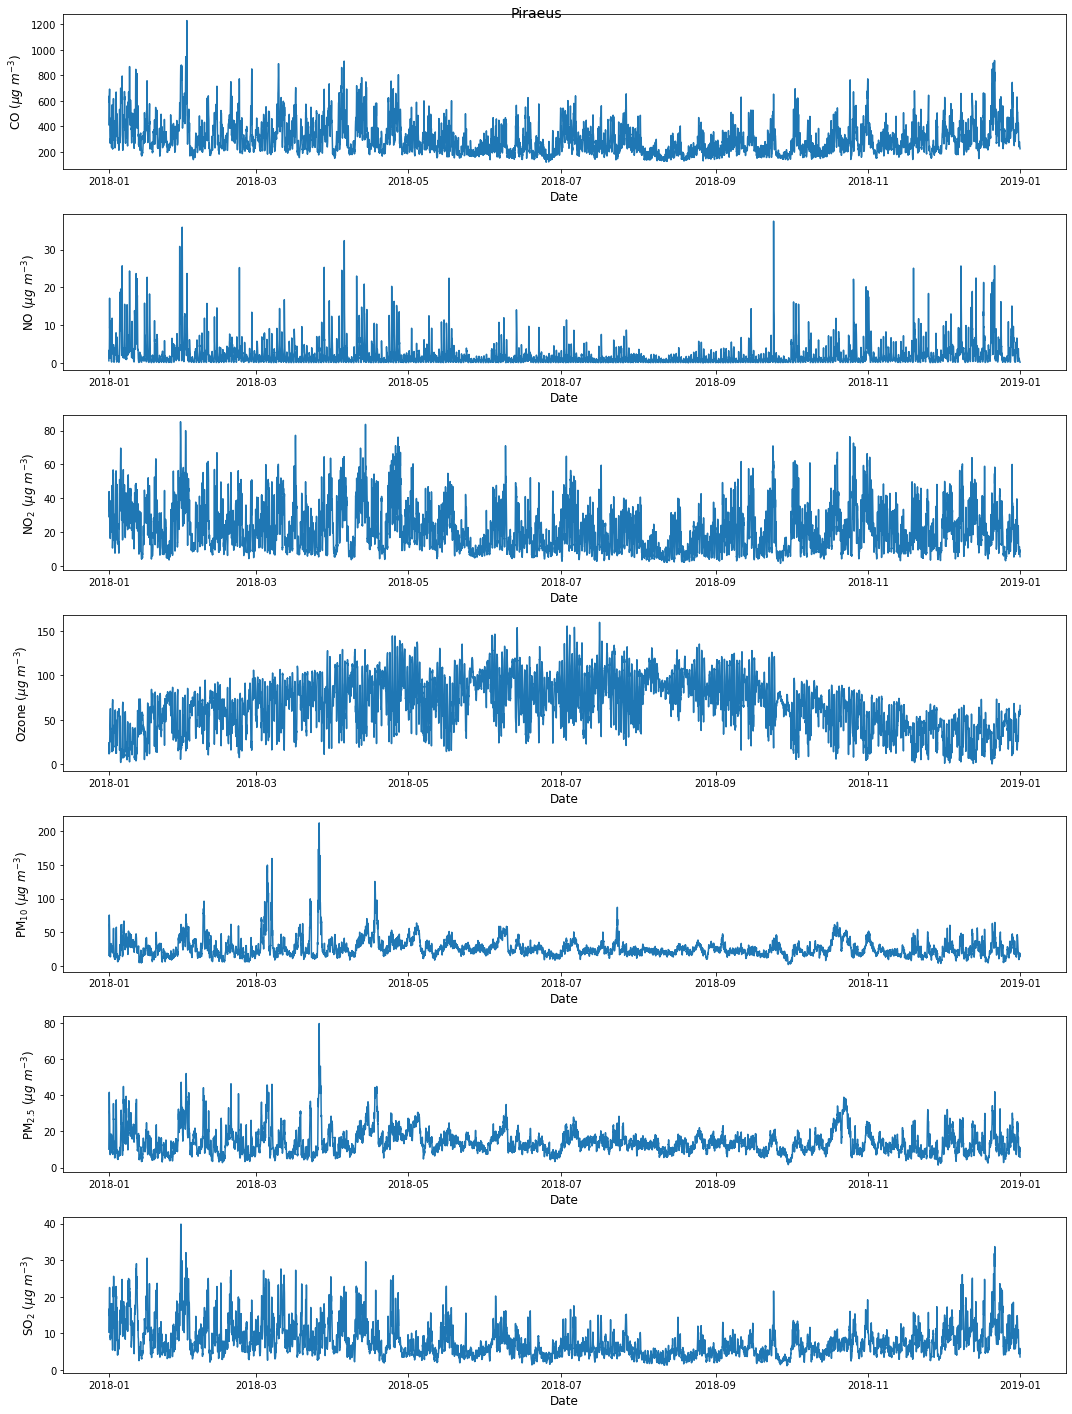

In [13]:
year = 2018

in_year = data_Eur_AQ.time.dt.year == year

fig, axs = plt.subplots(len(variables), 1, figsize = (15, 20))
for ax, variable in zip(axs.flatten(), variables):
    ax.plot(data_Eur_AQ.time[in_year], data_Eur_AQ[variable][in_year])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.suptitle(city, fontsize=14)
fig.tight_layout()